# Before you begin

## Update your course repository

You need to clone the course repository to Nova. You probably already have cloned this, so you can skip this step.

```bash
git clone git@github.com:EEOB-BioData/BCB546_Spring2024.git
```

You will still need to pull new changes to this repository at the beginning of class. This will enable you to access new data files and scripts needed for in-class activities.

```bash
cd BCB546_Spring2024
git pull
```

Note that if you have modified any files in the repository, you will need to commit those changes before you can pull new changes. If you don't care about the changes, just delete and re-clone the repository.

## Start Jupyter notebook on Nova on demand.

You can start Jupyter notebook on Nova on demand. This will allow you to run Jupyter notebook on the server and access it from your local machine.

1. Go to the [Nova OnDemand](https://nova-ondemand.its.iastate.edu/) and login
2. Under the "Interactive Apps" tab, click on "Jupyter Notebook", request desired resources and click "Launch"
3. Wait for the job to start and click on the "Connect to Jupyter" button



# Getting Started

To begin, we need to import the necessary libraries.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Pandas working with GFF3 file (SKIP)

GFF3 (General Feature Format version 3) is a standard file format for describing genes, transcripts, and other features in a genome. Pandas is a powerful data manipulation library in Python. In this tutorial, we'll explore how to use pandas to read and manipulate data from a GFF3 file.### Read GFF3 file (skip this step)

For this excercise We will download annotations for severla maize genomes and compare them.

In [2]:
## in bash (note the exclamation point in front of standard commands)
!wget https://download.maizegdb.org/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3.gz
!wget https://download.maizegdb.org/Zm-B97-REFERENCE-NAM-1.0/Zm-B97-REFERENCE-NAM-1.0_Zm00018ab.1.gff3.gz
!wget https://download.maizegdb.org/Zm-CML52-REFERENCE-NAM-1.0/Zm-CML52-REFERENCE-NAM-1.0_Zm00019ab.1.gff3.gz
!wget https://download.maizegdb.org/Zm-CML322-REFERENCE-NAM-1.0/Zm-CML322-REFERENCE-NAM-1.0_Zm00025ab.1.gff3.gz
!wget https://download.maizegdb.org/Zm-CML333-REFERENCE-NAM-1.0/Zm-CML333-REFERENCE-NAM-1.0_Zm00026ab.1.gff3.gz
!wget https://download.maizegdb.org/Zm-HP301-REFERENCE-NAM-1.0/Zm-HP301-REFERENCE-NAM-1.0_Zm00027ab.1.gff3.gz
!wget https://download.maizegdb.org/Zm-M37W-REFERENCE-NAM-1.0/Zm-M37W-REFERENCE-NAM-1.0_Zm00032ab.1.gff3.gz
!wget https://download.maizegdb.org/Zm-NC350-REFERENCE-NAM-1.0/Zm-NC350-REFERENCE-NAM-1.0_Zm00036ab.1.gff3.gz
!wget https://download.maizegdb.org/Zm-Oh43-REFERENCE-NAM-1.0/Zm-Oh43-REFERENCE-NAM-1.0_Zm00039ab.1.gff3.gz
!wget https://download.maizegdb.org/Zm-P39-REFERENCE-NAM-1.0/Zm-P39-REFERENCE-NAM-1.0_Zm00040ab.1.gff3.gz
!wget https://download.maizegdb.org/Zm-Tzi8-REFERENCE-NAM-1.0/Zm-Tzi8-REFERENCE-NAM-1.0_Zm00042ab.1.gff3.gz
!gunzip Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3.gz
!gunzip Zm-B97-REFERENCE-NAM-1.0_Zm00018ab.1.gff3.gz
!gunzip Zm-CML52-REFERENCE-NAM-1.0_Zm00019ab.1.gff3.gz
!gunzip Zm-CML322-REFERENCE-NAM-1.0_Zm00025ab.1.gff3.gz
!gunzip Zm-CML333-REFERENCE-NAM-1.0_Zm00026ab.1.gff3.gz
!gunzip Zm-HP301-REFERENCE-NAM-1.0_Zm00027ab.1.gff3.gz
!gunzip Zm-M37W-REFERENCE-NAM-1.0_Zm00032ab.1.gff3.gz
!gunzip Zm-NC350-REFERENCE-NAM-1.0_Zm00036ab.1.gff3.gz
!gunzip Zm-Oh43-REFERENCE-NAM-1.0_Zm00039ab.1.gff3.gz
!gunzip Zm-P39-REFERENCE-NAM-1.0_Zm00040ab.1.gff3.gz
!gunzip Zm-Tzi8-REFERENCE-NAM-1.0_Zm00042ab.1.gff3.gz

--2024-04-10 12:01:35--  https://download.maizegdb.org/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3.gz
Resolving download.maizegdb.org (download.maizegdb.org)... 172.67.74.80, 104.26.10.112, 104.26.11.112, ...
Connecting to download.maizegdb.org (download.maizegdb.org)|172.67.74.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12251264 (12M) [application/x-gzip]
Saving to: ‘Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3.gz’

Zm-B73-REFERENCE-NA 100%[===================>]  11.68M  30.6MB/s    in 0.4s    

2024-04-10 12:01:36 (30.6 MB/s) - ‘Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3.gz’ saved [12251264/12251264]

--2024-04-10 12:01:36--  https://download.maizegdb.org/Zm-B97-REFERENCE-NAM-1.0/Zm-B97-REFERENCE-NAM-1.0_Zm00018ab.1.gff3.gz
Resolving download.maizegdb.org (download.maizegdb.org)... 104.26.11.112, 172.67.74.80, 104.26.10.112, ...
Connecting to download.maizegdb.org (download.maizegdb.org)|104.26.11.112|:443... connected.
HTTP request

## A function to import GFF3 files and compute length metrics (SKIP)

In [3]:
import pandas as pd

def read_gff3(file='Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3', name='B73'):
    """
    Read a GFF3 file and extract information about mRNA sequences marked as canonical transcripts.

    Parameters:
        file (str): Path to the GFF3 file to read.
        name (str): Name of the organism or reference genome.

    Returns:
        pandas.DataFrame: DataFrame containing mRNA IDs, lengths, and organism names.
    """
    # Define column names for the GFF3 file
    columns = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']
    # Read the GFF3 file into a DataFrame
    df = pd.read_csv(file, sep='\t', comment='#', header=None, names=columns)
    # Filter rows to extract only mRNA sequences marked as canonical transcripts
    filter_condition = (df['type'] == 'mRNA') & (df['attributes'].str.contains('canonical_transcript=1'))
    df = df[filter_condition]
    # Calculate mRNA lengths
    df['length'] = df['end'] - df['start'] + 1
    # Extract mRNA IDs from attributes
    df['mRNA'] = df['attributes'].str.extract(r'ID=(.*?);')
    # Add organism or reference genome name
    df['name'] = name
    # Select relevant columns
    df = df[['mRNA', 'length', 'name']]
    # return the results
    return df


In [4]:
# The files we need to process

files = {'B73' : 'Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3', 
         'B97' : 'Zm-B97-REFERENCE-NAM-1.0_Zm00018ab.1.gff3',
         'CML52': 'Zm-CML52-REFERENCE-NAM-1.0_Zm00019ab.1.gff3',
         'CML322': 'Zm-CML322-REFERENCE-NAM-1.0_Zm00025ab.1.gff3',
         'CML333': 'Zm-CML333-REFERENCE-NAM-1.0_Zm00026ab.1.gff3',
         'HP301': 'Zm-HP301-REFERENCE-NAM-1.0_Zm00027ab.1.gff3',
         'M37W': 'Zm-M37W-REFERENCE-NAM-1.0_Zm00032ab.1.gff3',
         'NC350': 'Zm-NC350-REFERENCE-NAM-1.0_Zm00036ab.1.gff3',
         'Oh43': 'Zm-Oh43-REFERENCE-NAM-1.0_Zm00039ab.1.gff3',
         'P39': 'Zm-P39-REFERENCE-NAM-1.0_Zm00040ab.1.gff3',
         'Tzi8': 'Zm-Tzi8-REFERENCE-NAM-1.0_Zm00042ab.1.gff3'}

# lets run the function for each file and concatenate the results

dfs = []
for name, file in files.items():
    df = read_gff3(file, name)
    dfs.append(df)
df = pd.concat(dfs)

# let's save this as a CSV file
df.to_csv('maize_mRNA.csv', index=False)

## read the df of mRNA length

In [5]:
df.to_csv('maize_mRNA.csv', index=False)
df = pd.read_csv('maize_mRNA.csv')

Settings for changing the default figure size and resolution

In [6]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['figure.dpi'] = 300

First, let's look at the number of genes/mRNAs per maize line

<Axes: xlabel='name', ylabel='count'>

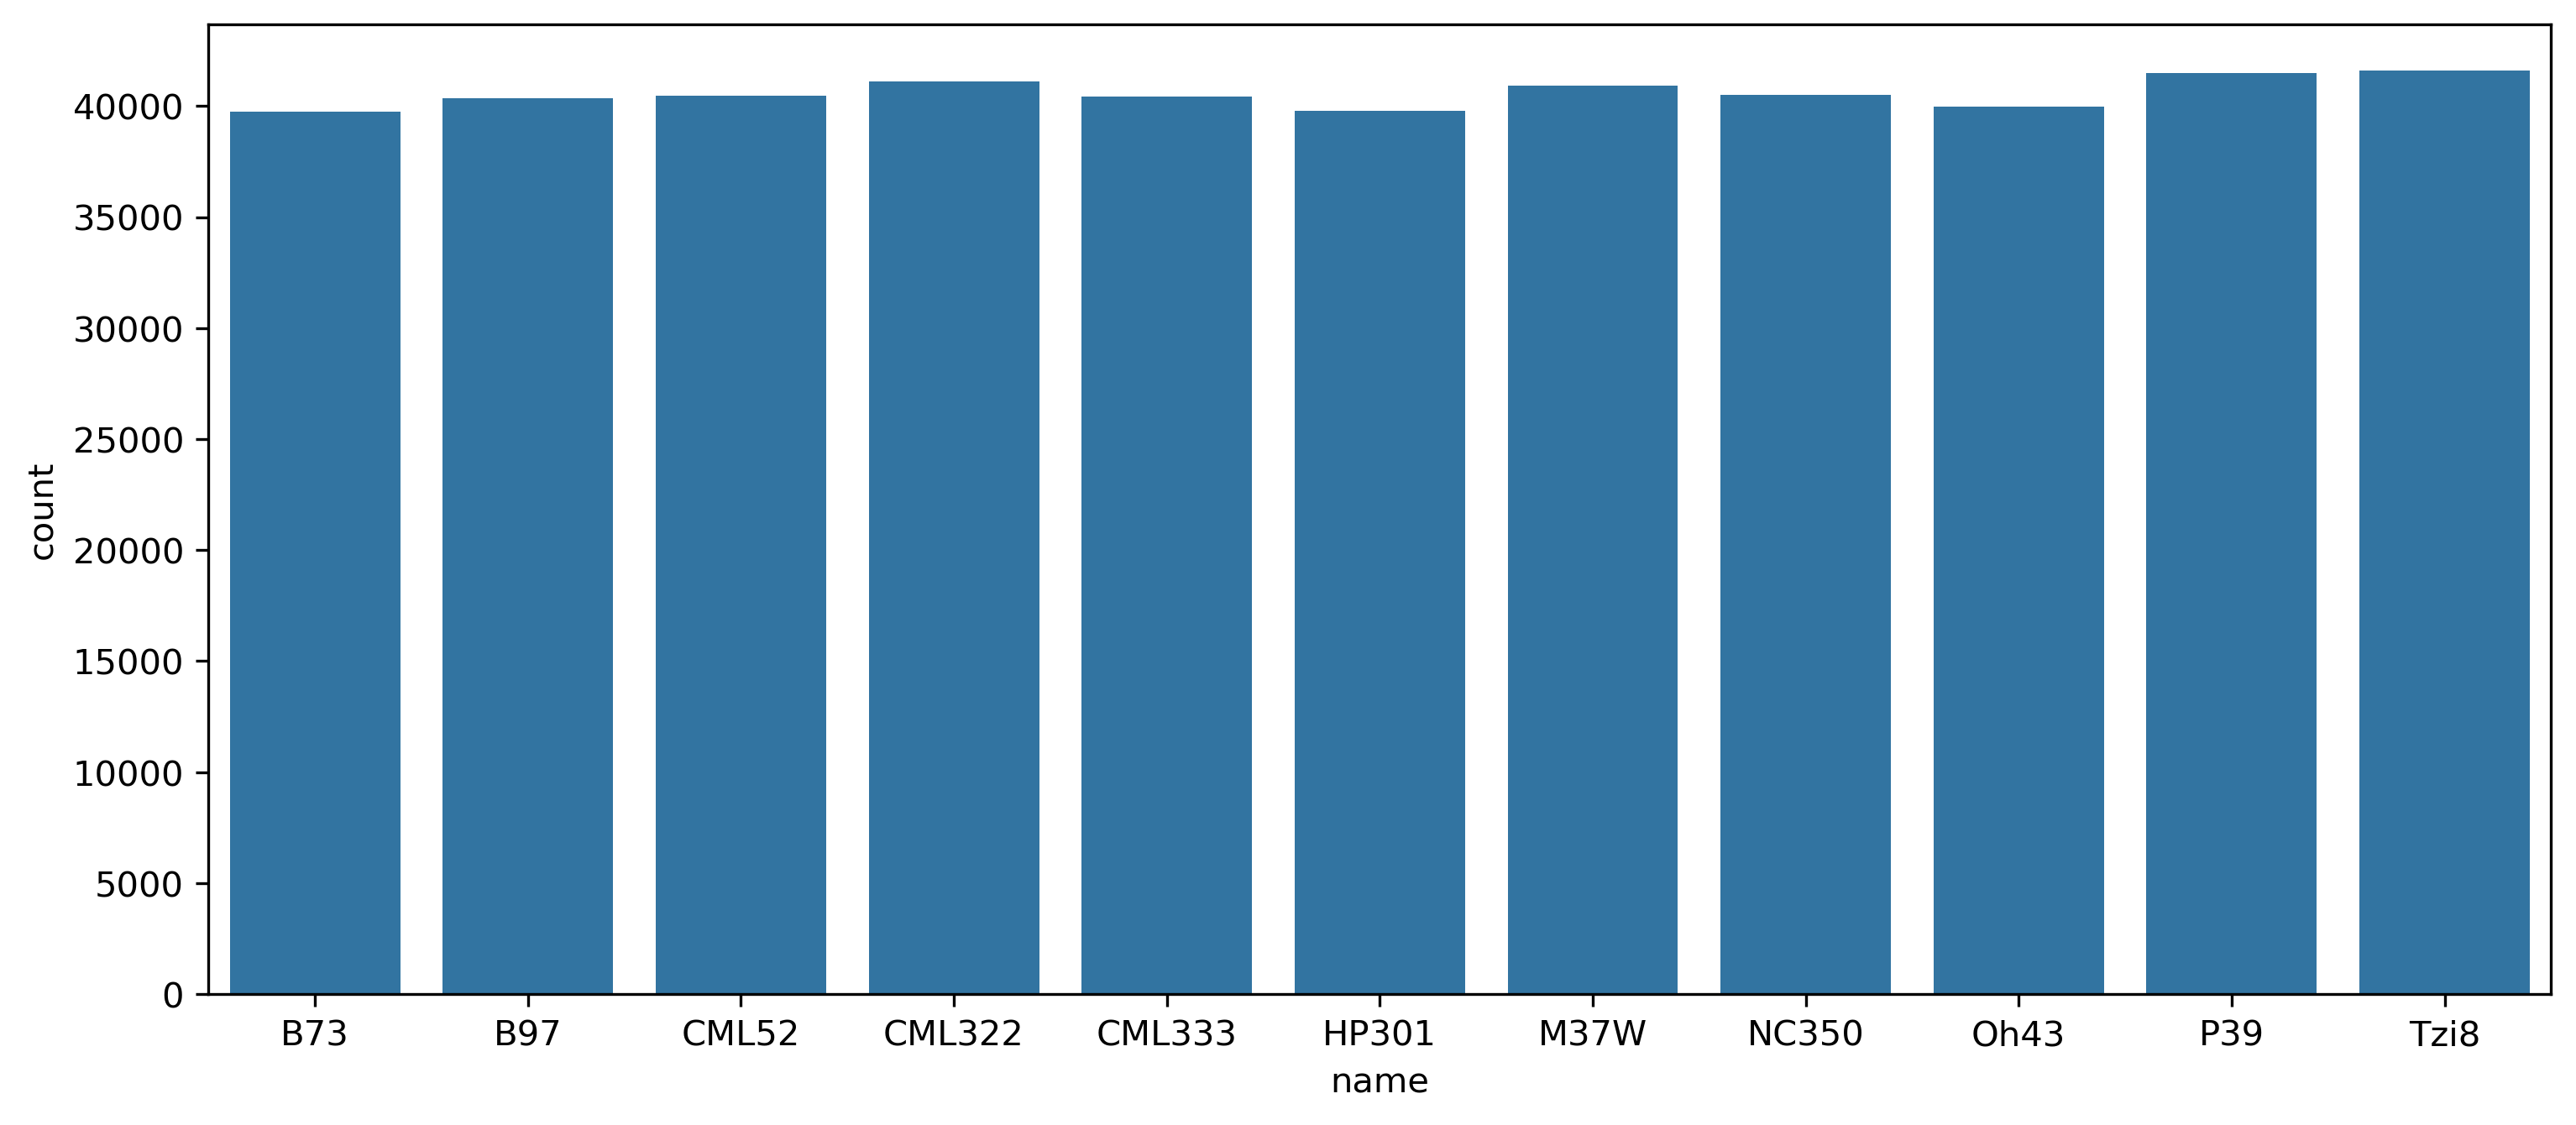

In [7]:
sns.countplot(data= df, x='name', stat='count')

We can color them based on maize line

<Axes: xlabel='name', ylabel='count'>

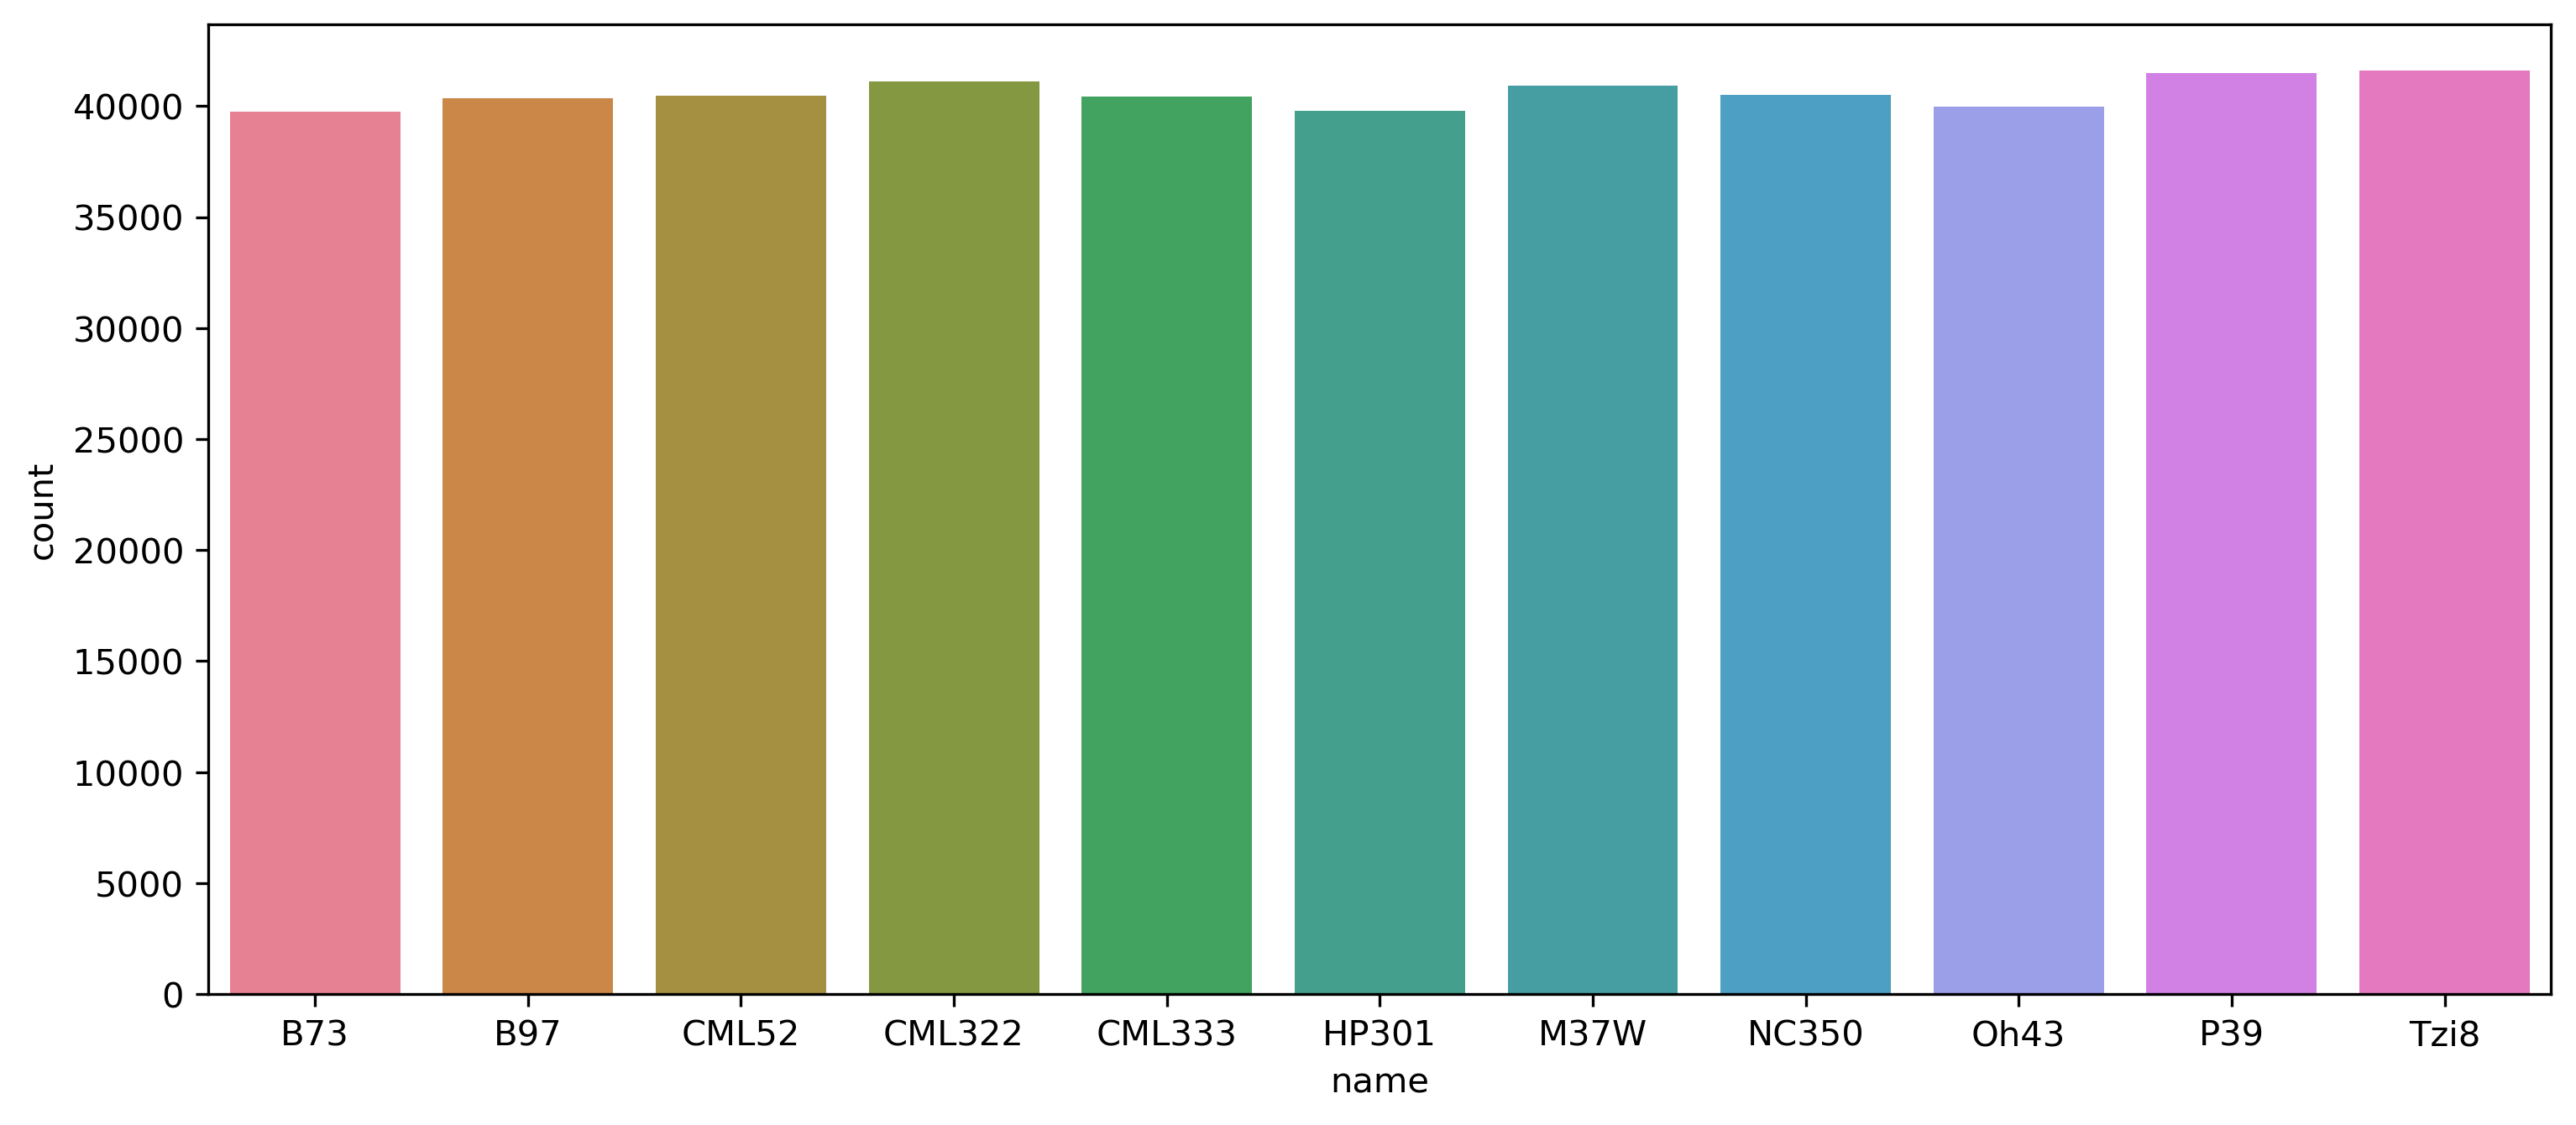

In [8]:
sns.countplot(data= df, x='name', stat='count', hue='name')

`sns.boxplot` is a seaborn function used to draw a box plot to visually represent the distribution of data within categories. It displays the distribution of quantitative data across several levels of one or more categorical variables. The box plot summarizes the central tendency, spread, and shape of the dataset's distribution, making it useful for comparing distributions and identifying outliers within different groups.

<Axes: xlabel='name', ylabel='length'>

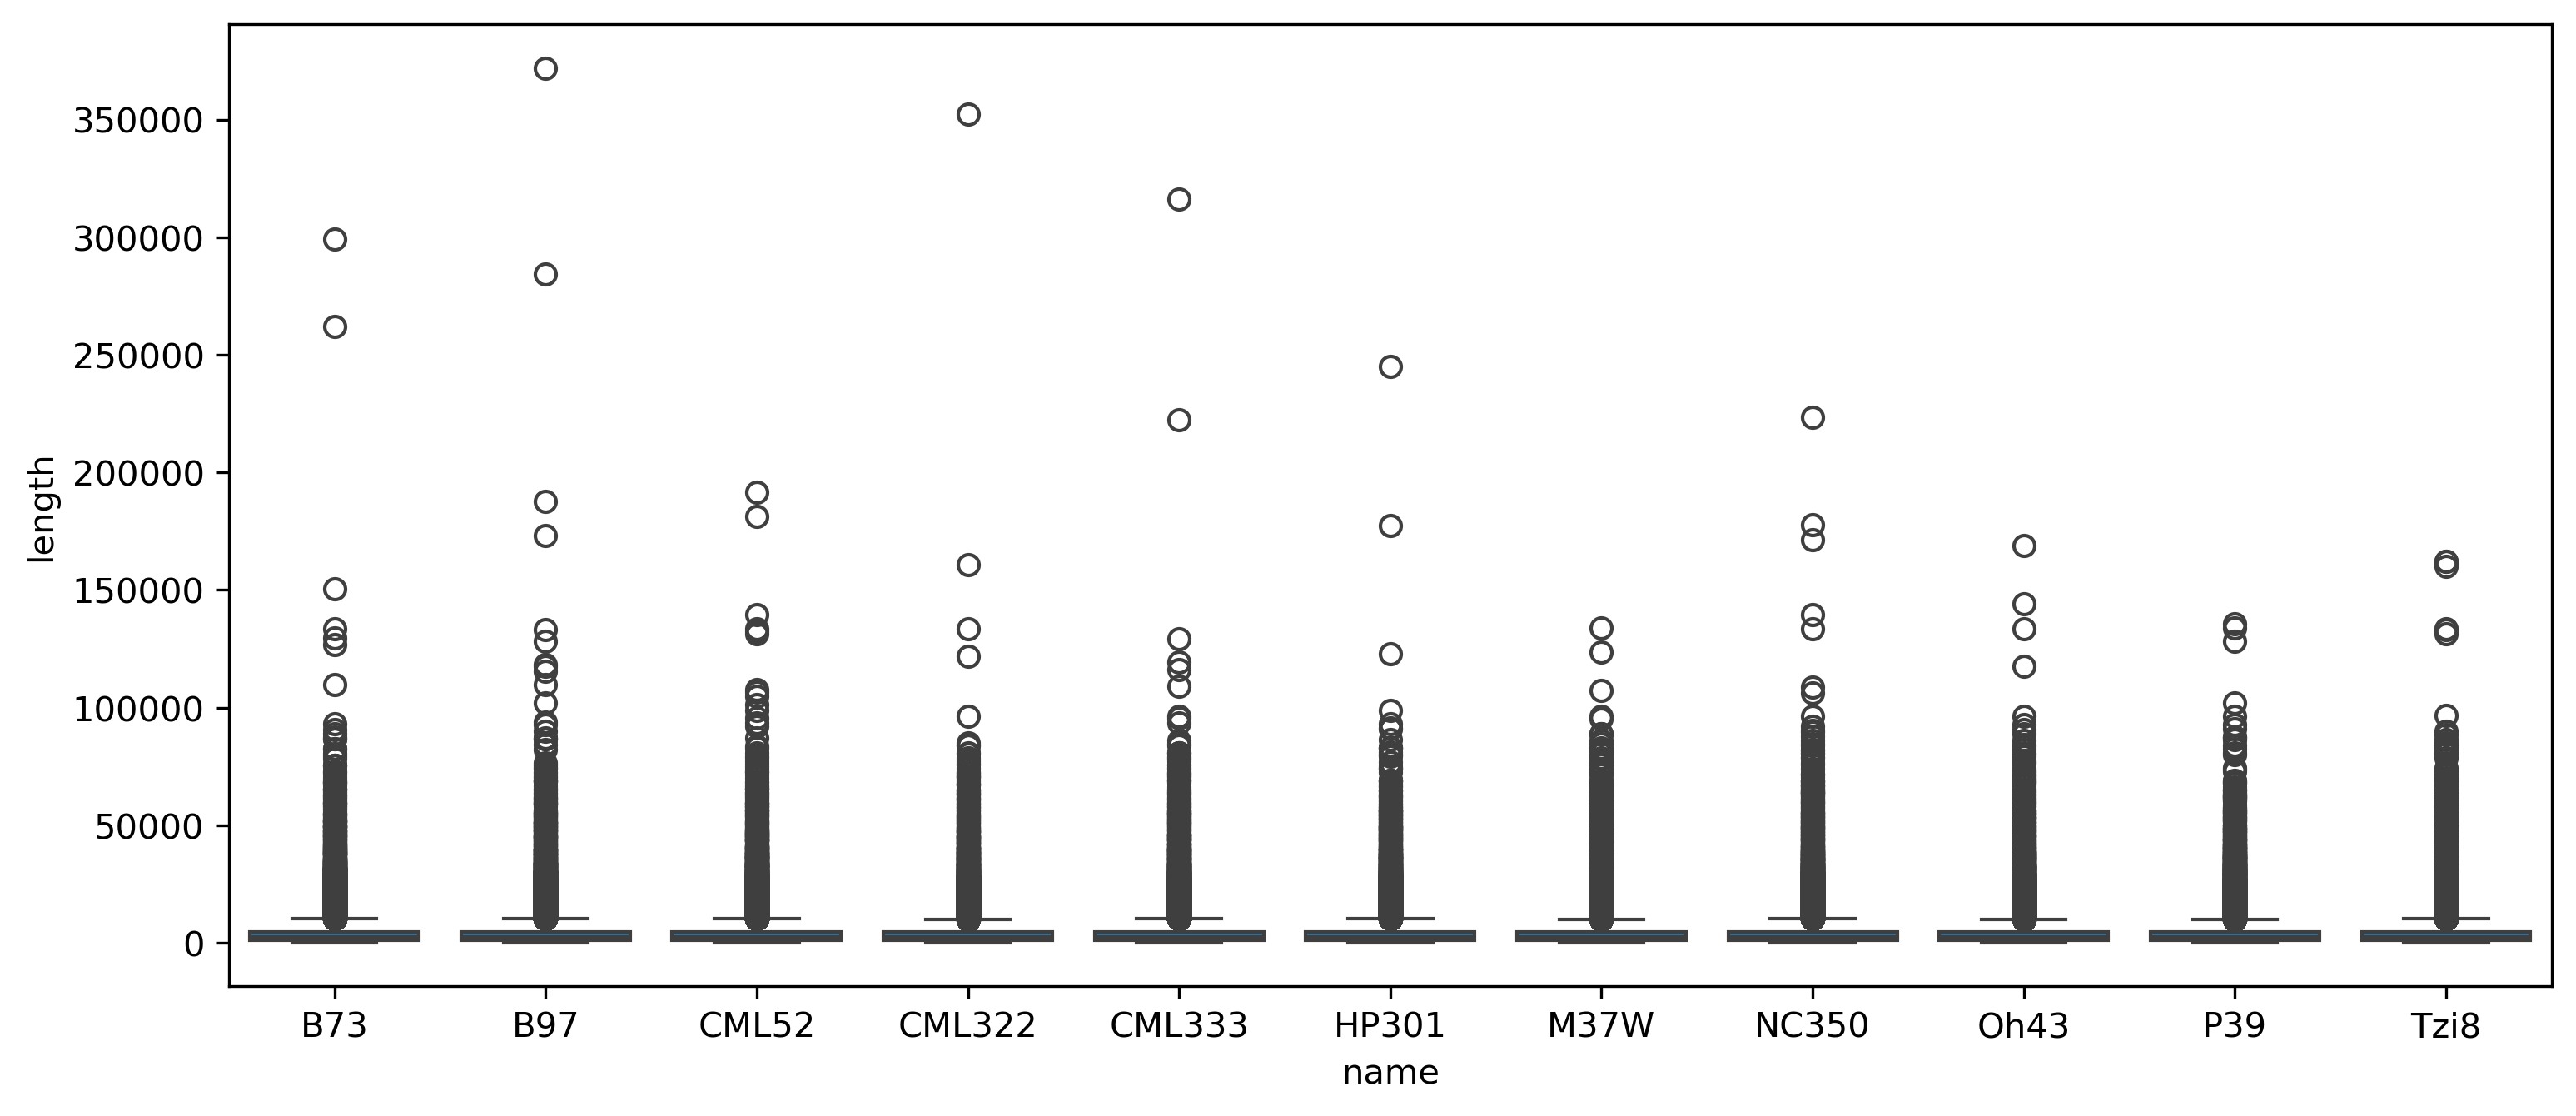

In [9]:
sns.boxplot(data=df, x='name', y='length')

In our case, log sacle makes a better choice to visualize boxplot

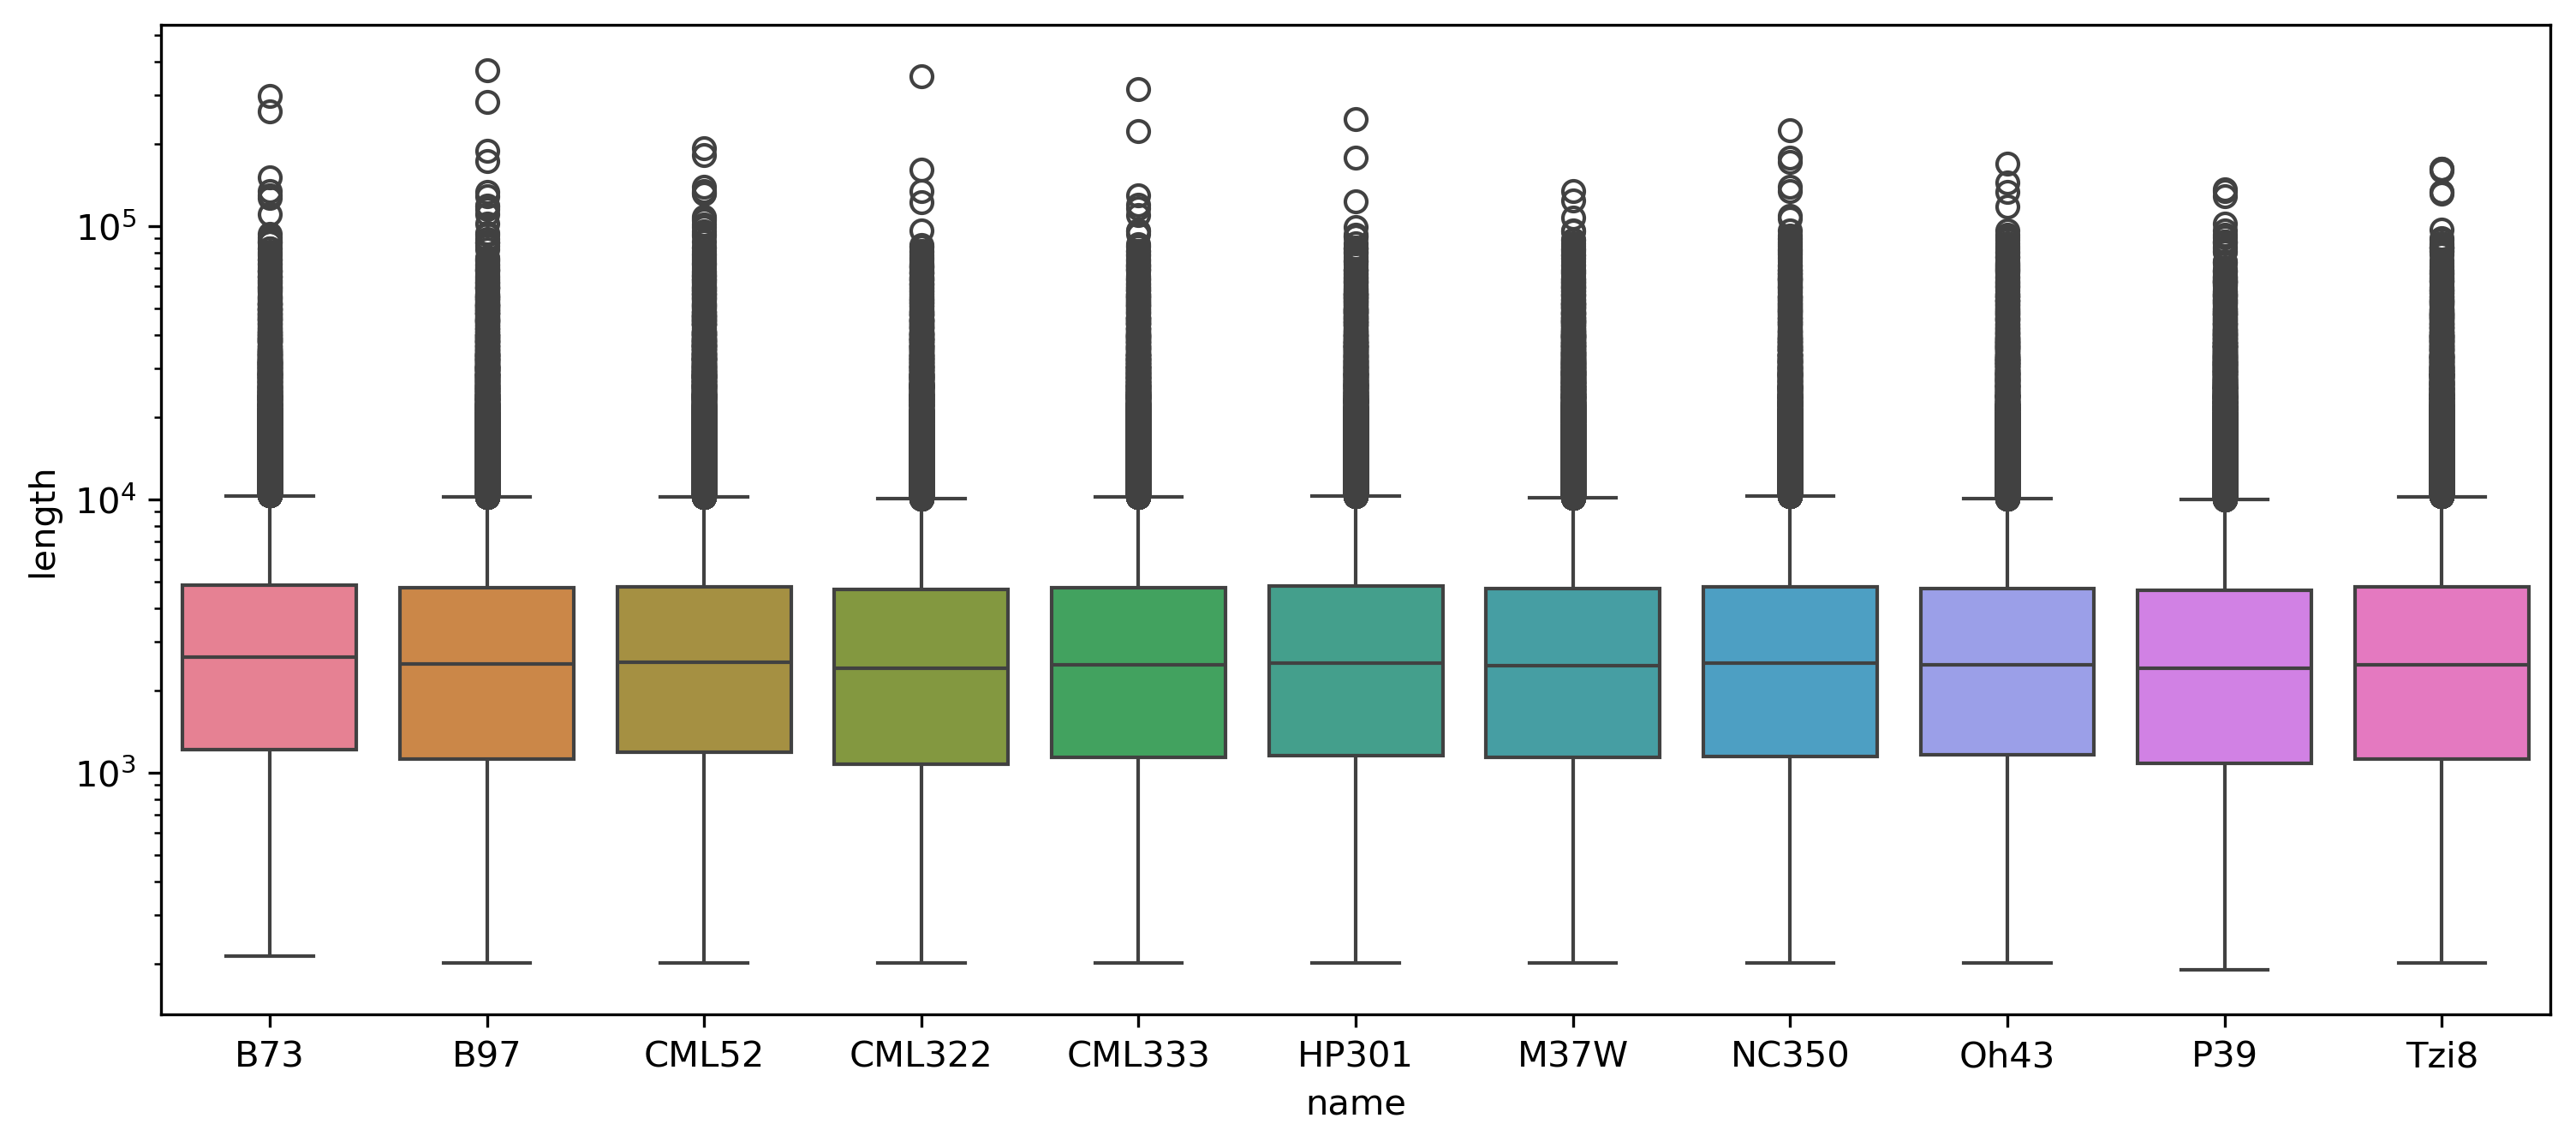

In [10]:
sns.boxplot(data=df, x='name', y='length', hue = 'name')
plt.yscale('log')
plt.show()

Instead, it can also be visualized as violin plot

`sns.violinplot` is a seaborn plot that combines a box plot with a kernel density estimation to provide insights into the distribution and density of a continuous variable across different categories.

<Axes: xlabel='name', ylabel='length'>

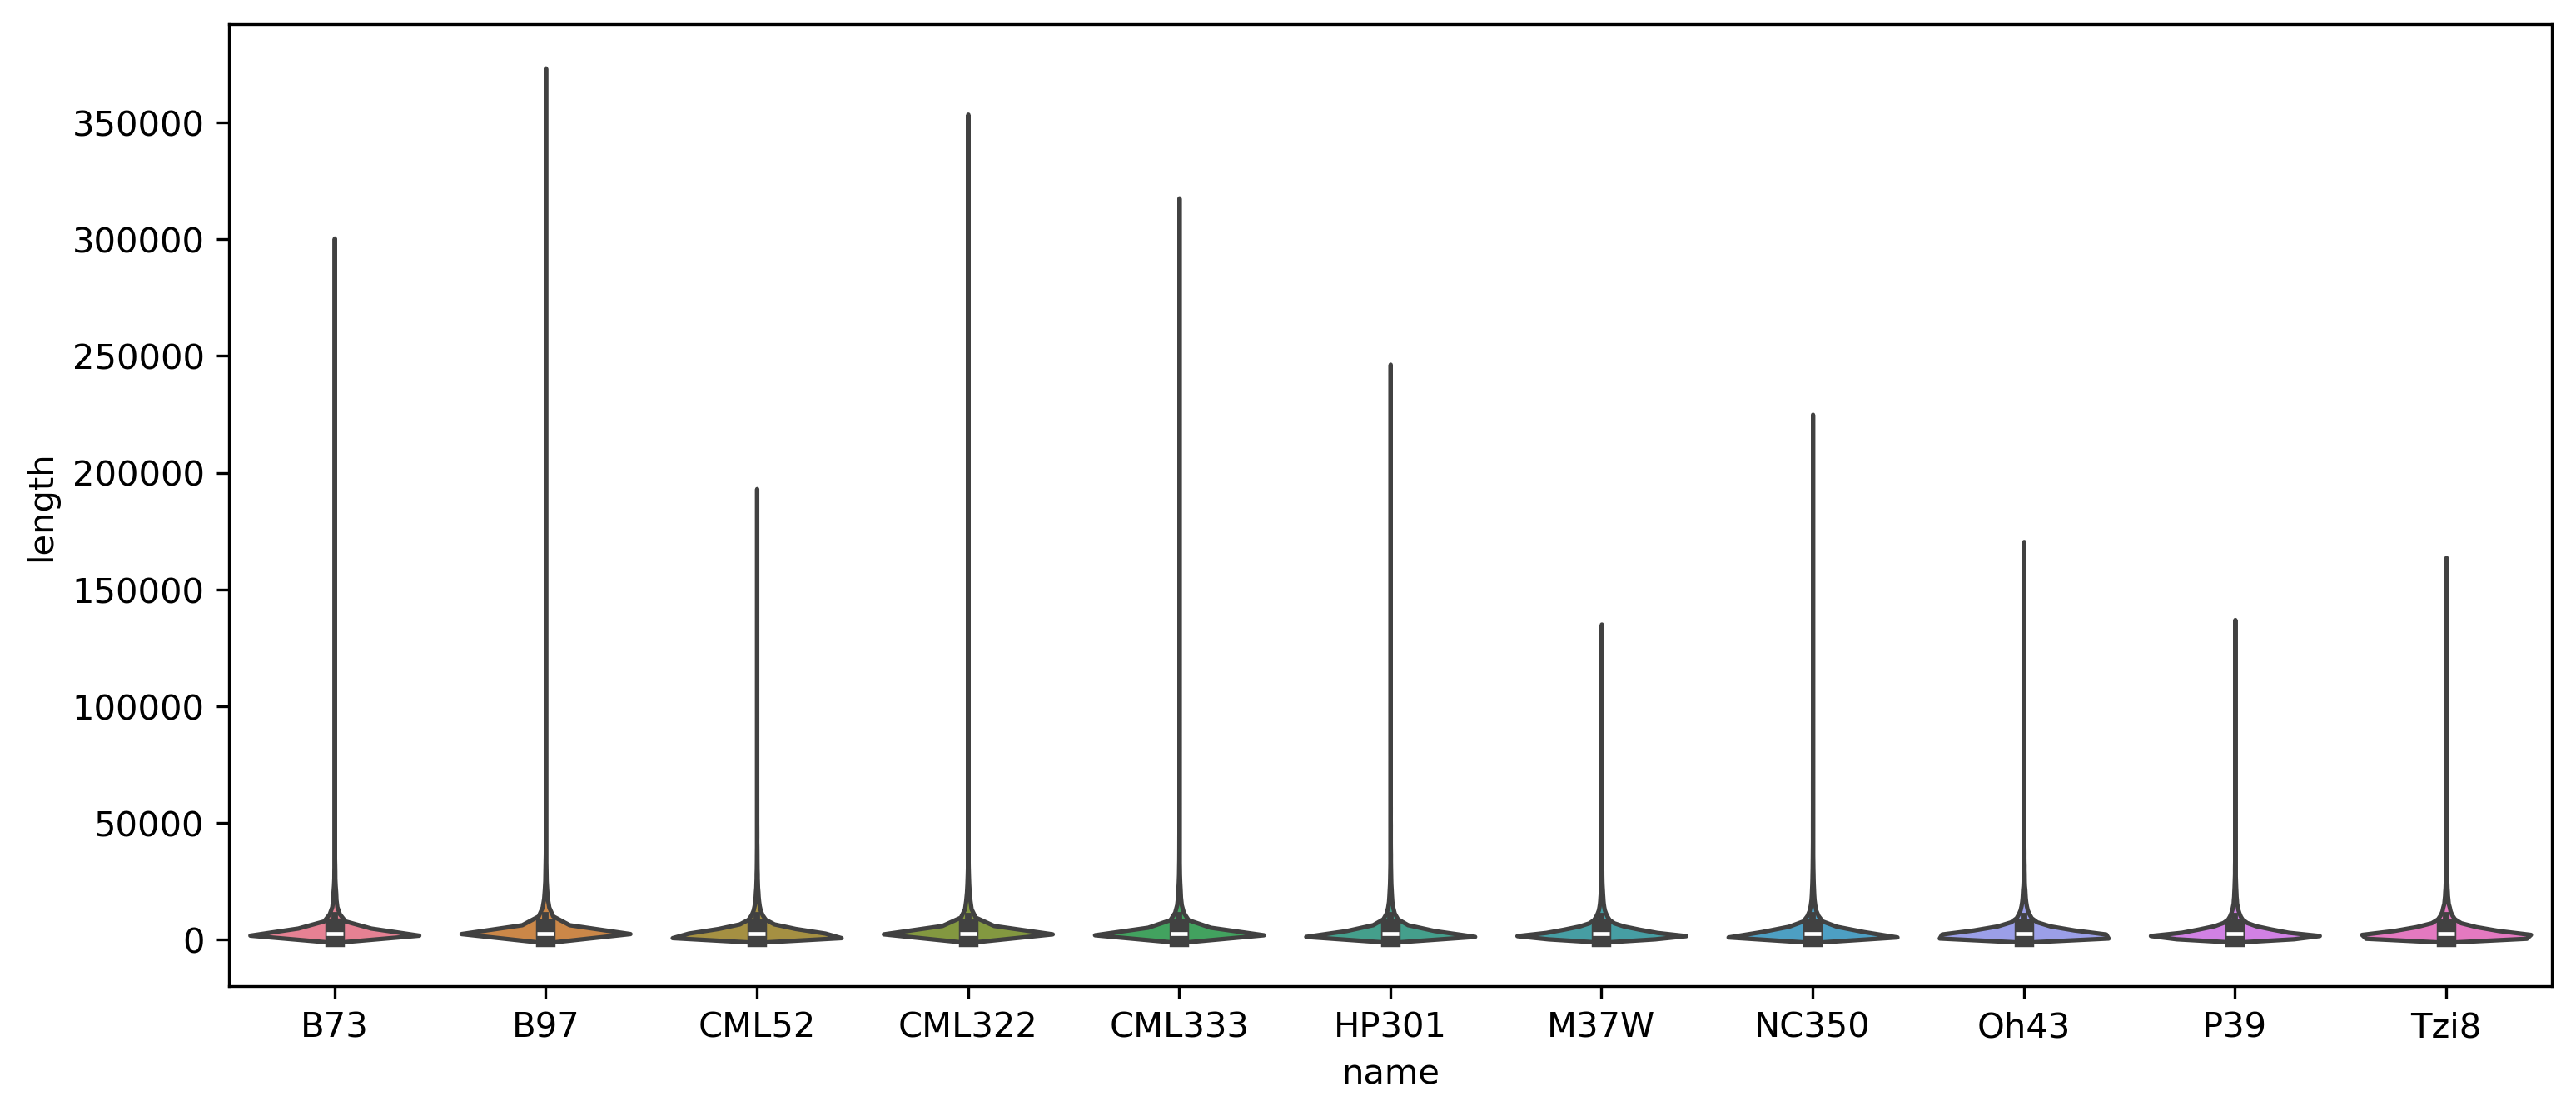

In [11]:
sns.violinplot(data=df, x='name', y='length', hue = 'name')


Some options might make this appealing

<Axes: xlabel='name', ylabel='length'>

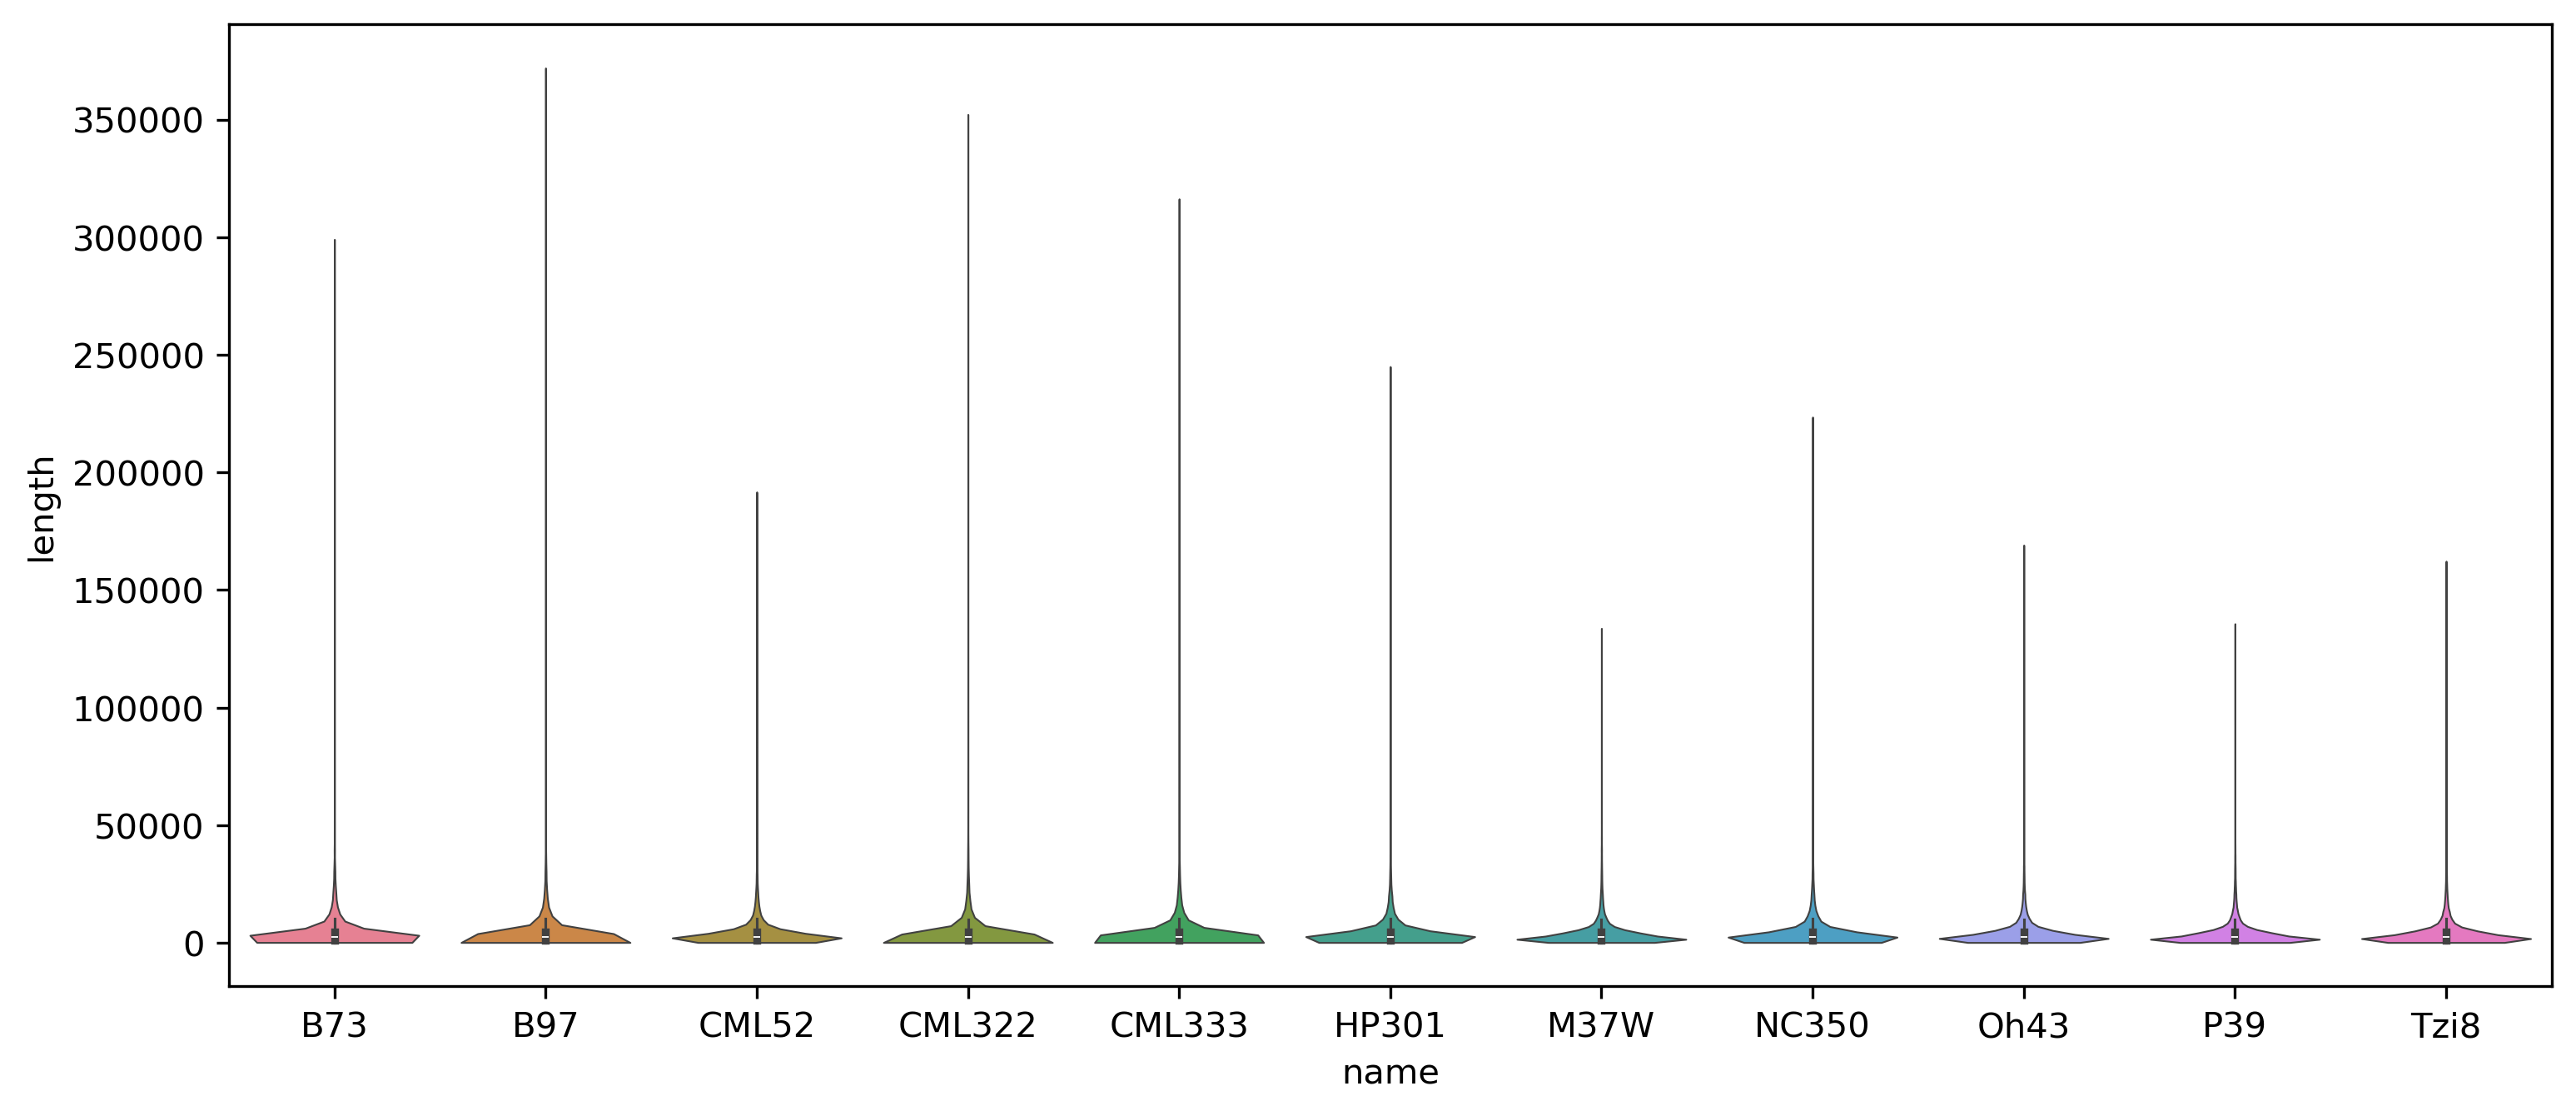

In [12]:
sns.violinplot(data=df, x='name', y='length', hue = 'name', cut=0, linewidth=0.5)

`sns.stripplot` can visualize the distribution of data points for a continuous variable within categories. It displays individual data points as strips along a categorical axis, making it useful for understanding the distribution of values within each category and identifying potential outliers or patterns. `stripplot` is particularly effective when dealing with relatively small datasets or when you want to show the raw data points along with their distribution.

<Axes: xlabel='name', ylabel='length'>

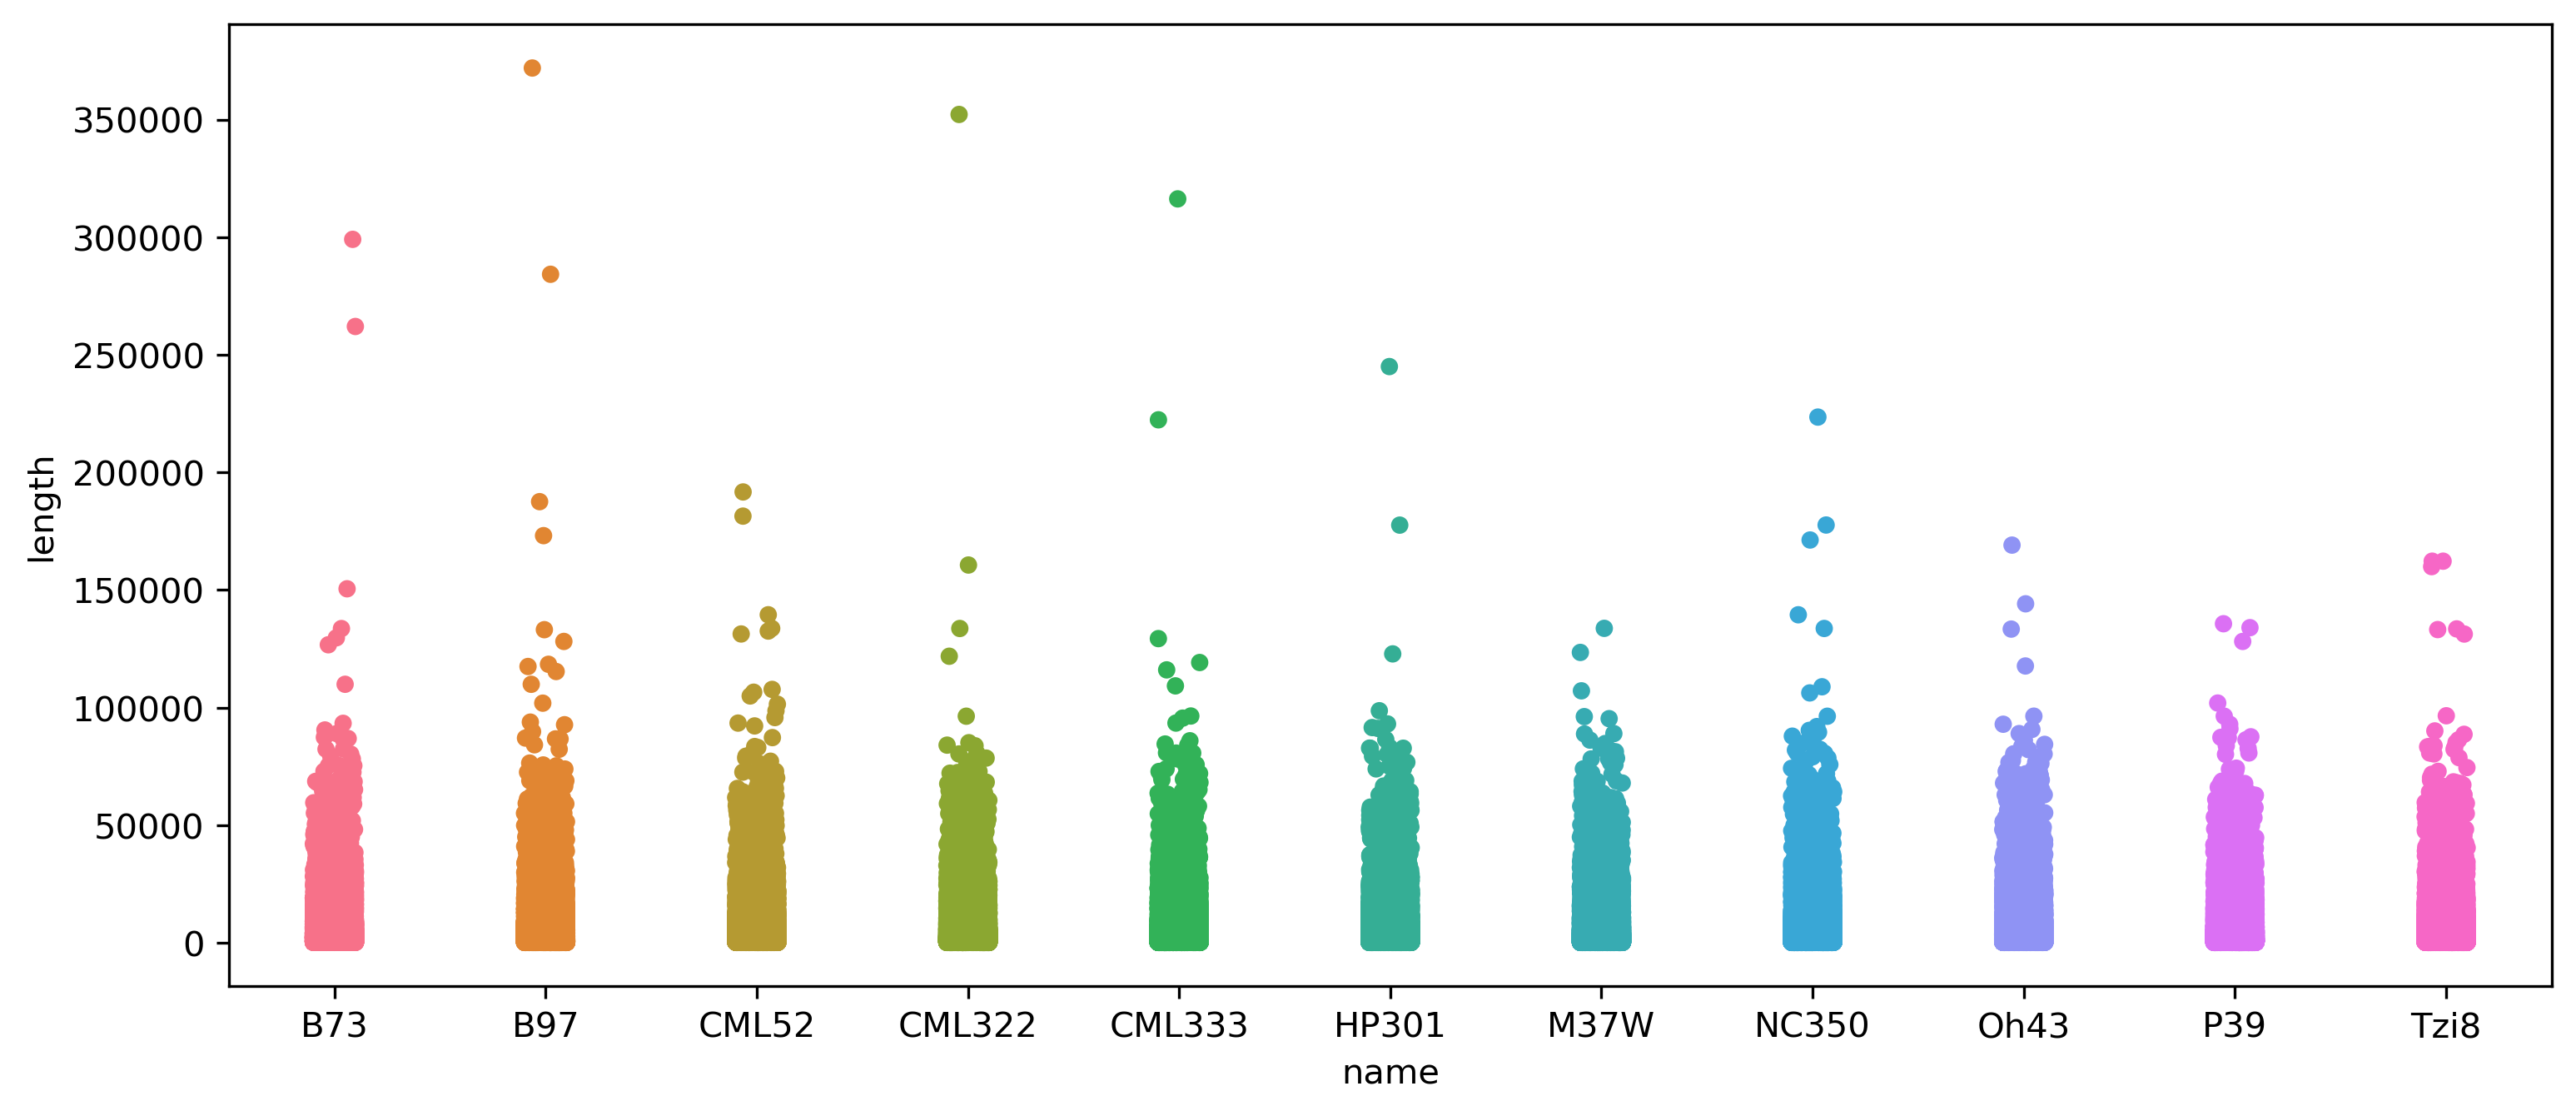

In [13]:
sns.stripplot(data=df, x="name", y="length", hue="name")

adjust dot transperncey:

<Axes: xlabel='name', ylabel='length'>

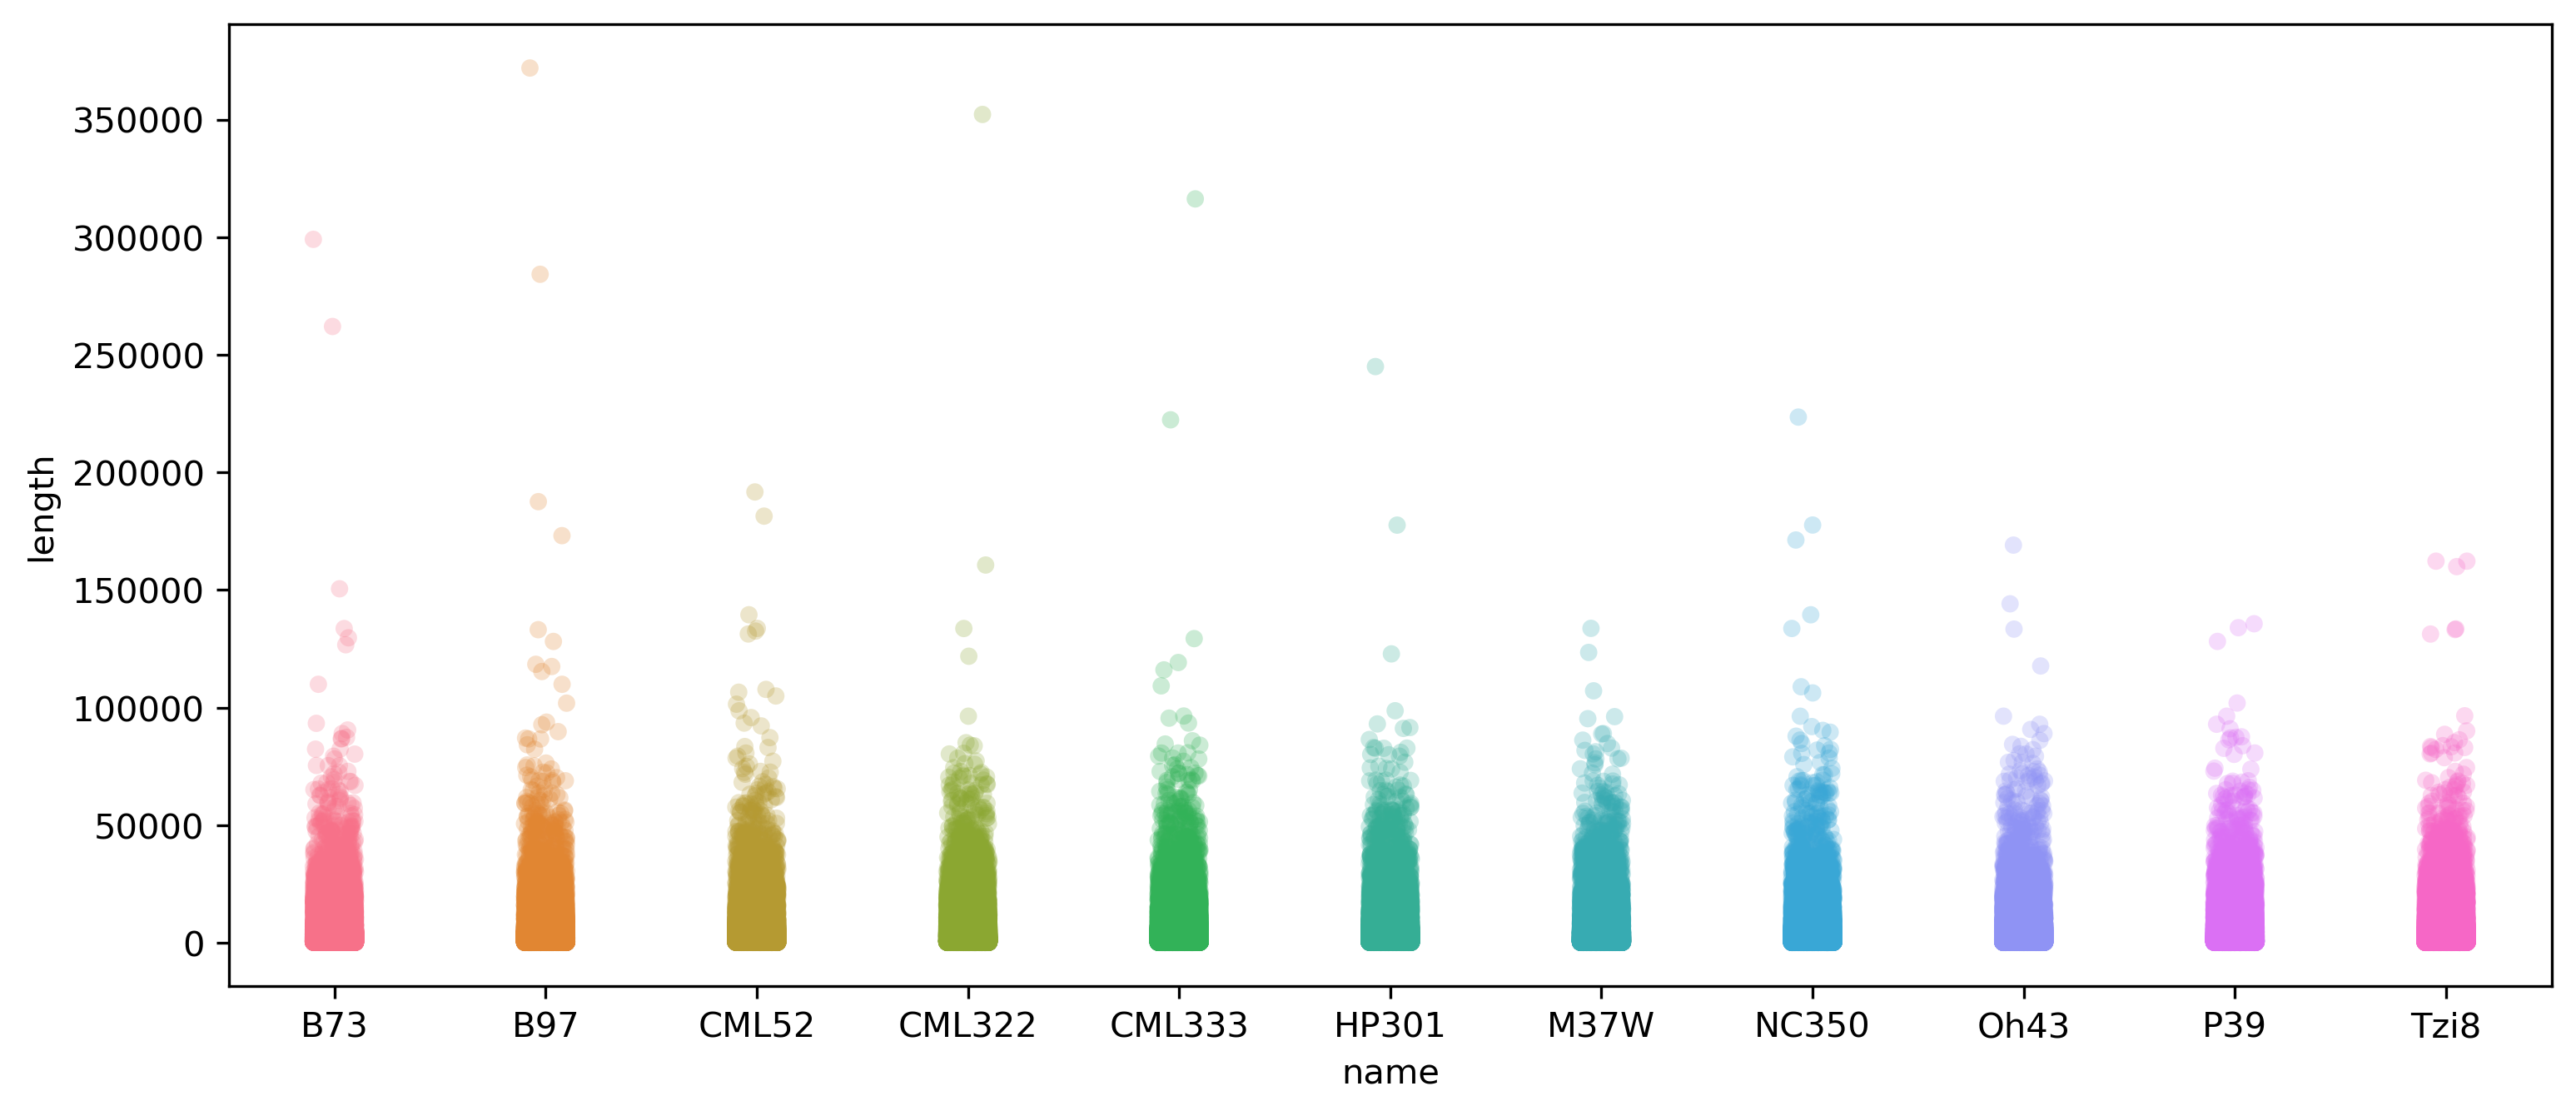

In [14]:
sns.stripplot(
    data=df, x="name", y="length", hue="name",
    alpha=.25, legend=False
)

Instead of all points, you can also plot specific stat, eg: conditional means, using `sns.pointplot`, aligning each pointplot in the center of the strips by adjusting the width allotted to each category (.8 by default) by the number of hue levels

<Axes: xlabel='name', ylabel='length'>

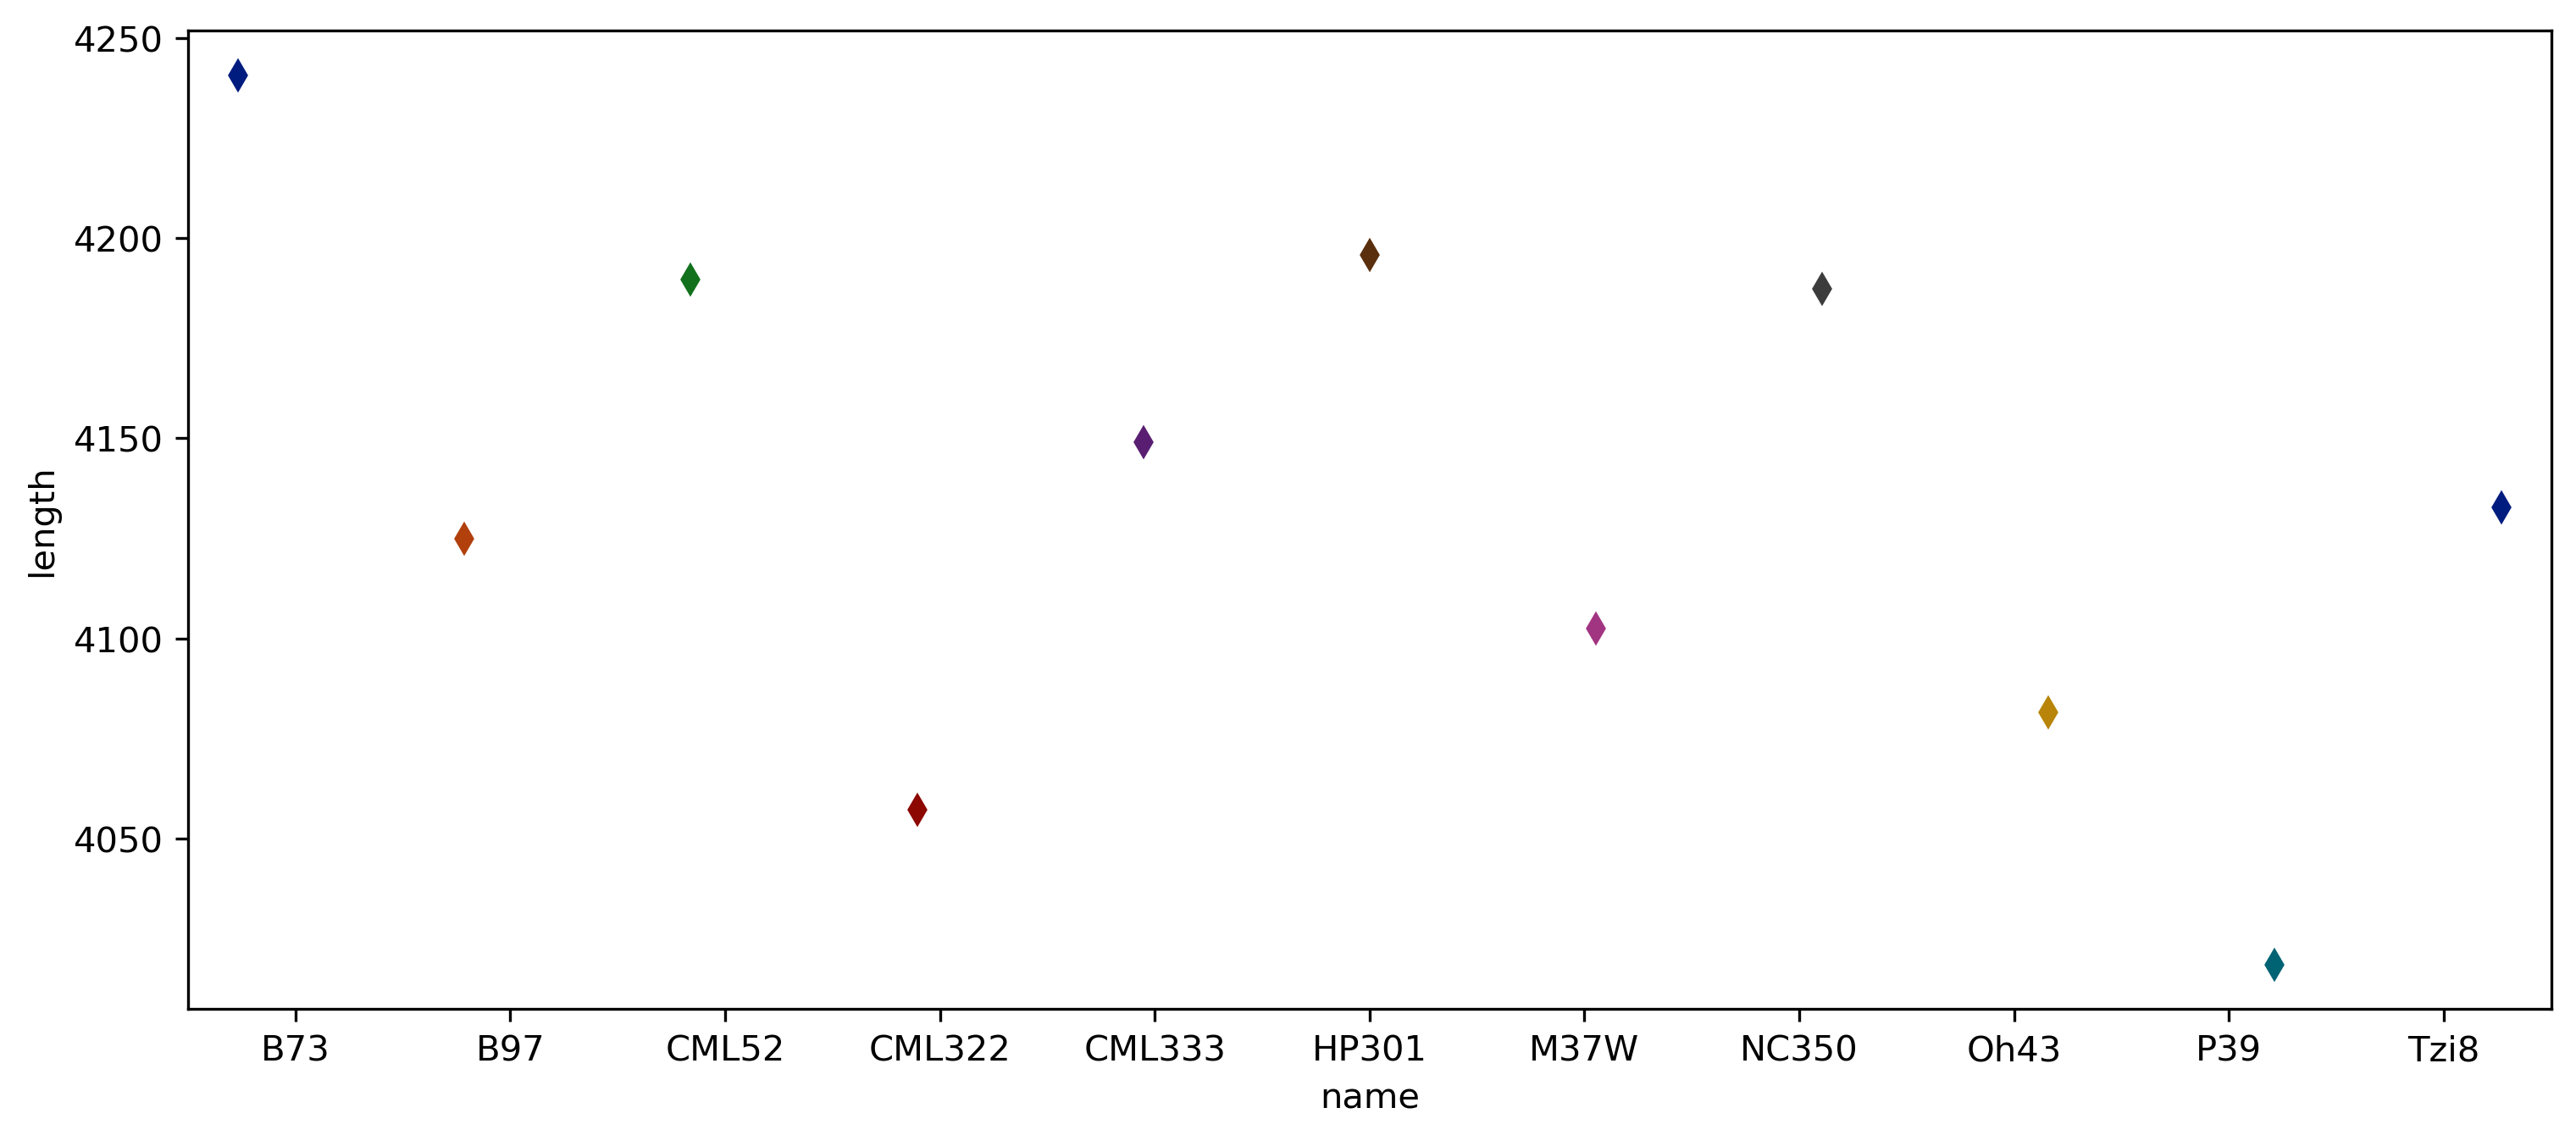

In [15]:
sns.pointplot(
    data=df, x="name", y="length", hue="name",
    dodge=.8 - .8 / 3, palette="dark", errorbar=None,
    markers="d", markersize=4, linestyle="none",
)

## Plotting large distributions

`sns.boxenplot` is a type of seaborn plot used for visualizing the distribution of a continuous variable across different categories. It is an enhanced version of the box plot, also known as a "letter-value plot" or a "raincloud plot", which provides additional quantiles to better represent the shape of the distribution, particularly for larger datasets with more complex distributions. This plot is useful for identifying variations and outliers within each category and comparing distributions between categories.

<Axes: xlabel='name', ylabel='length'>

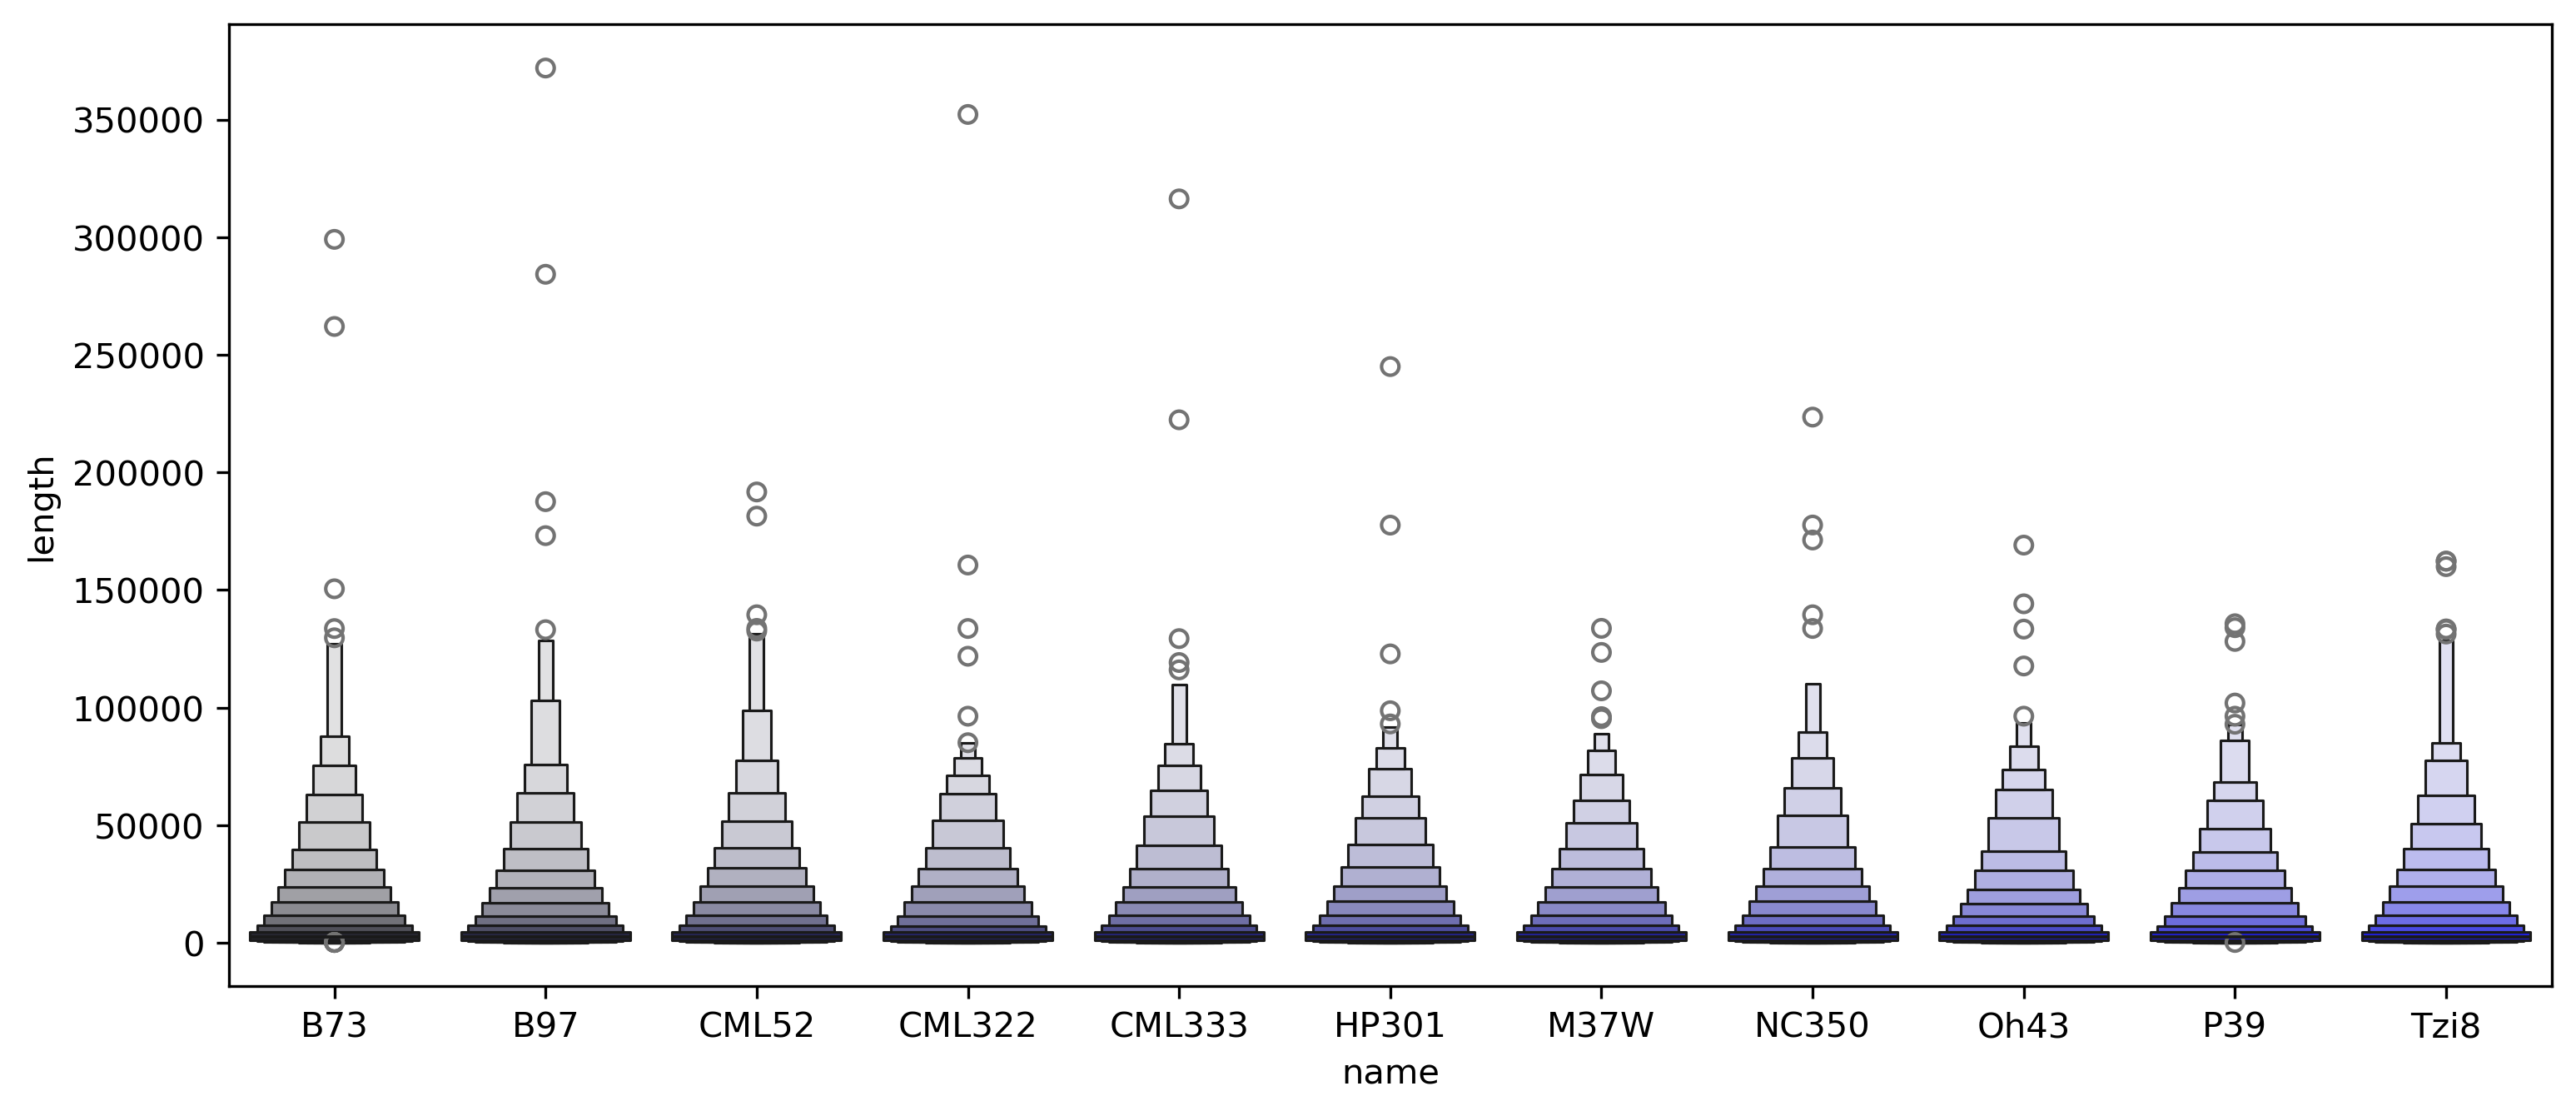

In [16]:
sns.boxenplot(
    data=df, x="name", y="length", hue="name",
    palette='dark:b', width_method="linear",
)